In [30]:
import matplotlib.pyplot as plt
import numpy as np
from darkrate_fxns_sam import *
from scipy.fftpack import rfft,fftfreq
from scipy import interpolate

In [4]:
# acquire all file names in directory
filespath = '/Users/samuelfogarty/OneDrive/Desktop/OneDrive/photondetectortests/data/singlephotonsearch/'
abovebreakdown = '10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_44.135VBias'
belowbreakdown = '10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_10.935VBias'
# file path of each directory
filespath_bbd = filespath + belowbreakdown
filespath_abd = filespath + abovebreakdown
# list of file names in each directory
filenames_bbd = os.listdir(filespath_bbd)
filenames_abd = os.listdir(filespath_abd)

In [78]:
filepath_abd = filespath_abd + '/'+ filenames_abd[0]
t_abd, V_abd = getData(filepath_abd)
filepath_bbd = filespath_bbd + '/'+ filenames_bbd[0]
t_bbd, V_bbd = getData(filepath_bbd)

In [79]:
# interpolate voltages
def interp(t,V):
    nonInfOrNaN = np.isfinite(V)
    isInfOrNaN = np.invert(nonInfOrNaN)
    V_finite = V[nonInfOrNaN]
    t_finite = t[nonInfOrNaN]
    f = interpolate.interp1d(t_finite, V_finite,kind='cubic')
    f_voltages = f(t)
    return f_voltages

In [80]:
# do fast fourier transform of voltage dataset
def doFFT(t,voltages):
    n = t.size
    dt = t[1] - t[0]
    freqs = fftfreq(n,d=dt)
    fft_y = rfft(voltages)
    return freqs, fft_y

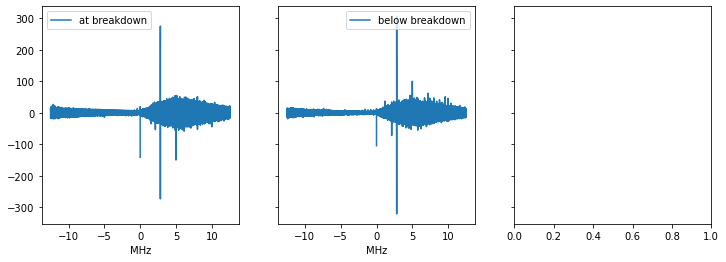

In [98]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=True, figsize=(12,4))
f_voltages_abd = interp(t_abd,V_abd)
freqs, fft_y_abd = doFFT(t_bbd,f_voltages_abd)
f_voltages_bbd = interp(t_bbd,V_bbd)
freqs, fft_y_bbd = doFFT(t_bbd,f_voltages_bbd)
axes[0].plot(freqs*1e-6, fft_y_abd,label='at breakdown')
axes[1].plot(freqs*1e-6, fft_y_bbd,label='below breakdown')
#axes[2].plot(freqs*1e-6, fft_y_abd - fft_y_bbd,label='difference')
axes[0].set_xlabel('MHz')
axes[1].set_xlabel('MHz')
#axes[2].set_xlabel('MHz')
axes[0].legend()
axes[1].legend()
#axes[0].set_xlim(4.9, 5.1)
#axes[2].legend()

In [61]:
InfNan_loc = np.where(isinfornan == True)[0]
f = interpolate.interp1d(t_noinf, V_noinf,kind='cubic')

In [70]:
points = 100
start = InfNan_loc[10] - points
end = InfNan_loc[10] + points
times = t[start:end]
voltages = V[start:end]
f_voltages = f(times)

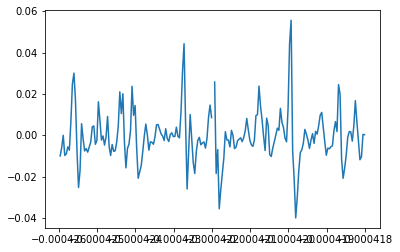

In [72]:
plt.plot(times,voltages)
plt.plot(times, f_voltages)

(array([ 26958,  59805,  59808, ..., 999780, 999783, 999853]),)